# Import dataset

In [516]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

In [517]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train = train.sample(frac=1).reset_index(drop=True)

In [518]:
def basic_data_info(df):
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
    display(df.head(15))

In [519]:
pd.set_option('display.max_colwidth', None)
basic_data_info(train)

Number of rows: 891
Number of columns: 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S
1,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
2,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
3,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Barron)",female,48.0,0,0,17466,25.9292,D17,S
4,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
5,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S
6,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
7,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
8,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S
9,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C


In [520]:
basic_data_info(test)

Number of rows: 418
Number of columns: 11


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Data exploration

In [521]:
explore = train.copy()

## Features

Survived - 0: No, 1: Yes

In [522]:
for col in explore.columns:
    print(col, train[col].nunique(), end=', ')

PassengerId 891, Survived 2, Pclass 3, Name 891, Sex 2, Age 88, SibSp 7, Parch 7, Ticket 681, Fare 248, Cabin 147, Embarked 3, 

In [523]:
# Check for NaN counts in all columns for both train and test datasets
print("NaN counts in train dataset:")
print(explore.isna().sum())

print("\nNaN counts in test dataset:")
print(explore.isna().sum())

NaN counts in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

NaN counts in test dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Pclass

In [524]:
def display_correlation(x_name, y_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=x_name, hue=y_name)
    plt.title('Survived vs Not Survived for Each ' + x_name)
    plt.xlabel(x_name)
    plt.ylabel('Count')
    plt.legend(title=y_name, loc='upper right')
    plt.show()

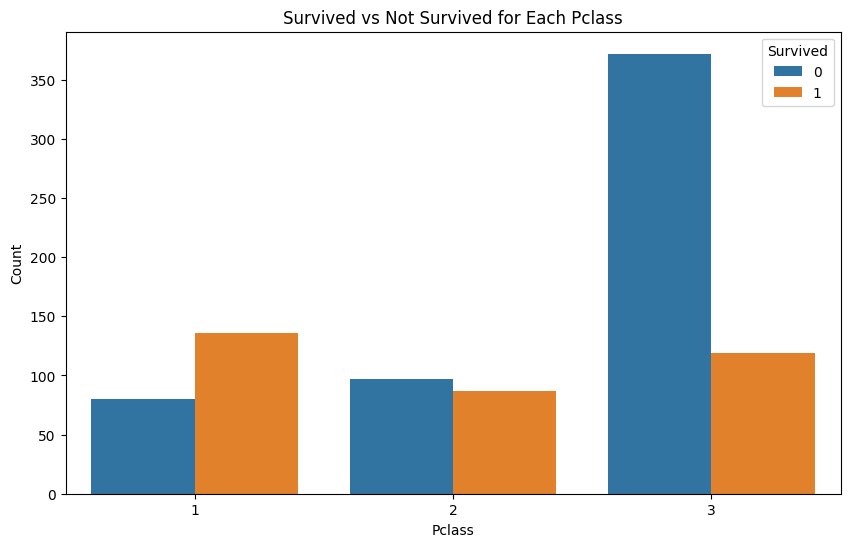

In [525]:
display_correlation('Pclass', 'Survived')

### Name

#### Surname

In [526]:
explore['Surname'] = explore['Name'].apply(lambda x: x.split(",")[0])
explore[['Name', 'Surname']].nunique()

Name       891
Surname    667
dtype: int64

Could look at correlation with families, or use to work out if husband/wife are on board (thus splitting sibsp).

In [527]:
import collections
c = collections.Counter(explore['Surname'])
explore['family_size'] = explore['Surname'].apply(lambda x: c[x]-1)

#### Title

In [528]:
explore['Title'] = explore['Name'].apply(lambda x: x.split(",")[1].split(".")[0])
explore[['Name', 'Title']].nunique()

Name     891
Title     17
dtype: int64

In [529]:
explore['Title'] = explore['Title'].apply(lambda x: x.strip(' ') if x in [' Mr', ' Mrs', ' Miss', ' Master'] else 'Other')

In [530]:
display_correlation('Title', 'Survived')

ValueError: Could not interpret value `Title` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

### Sex

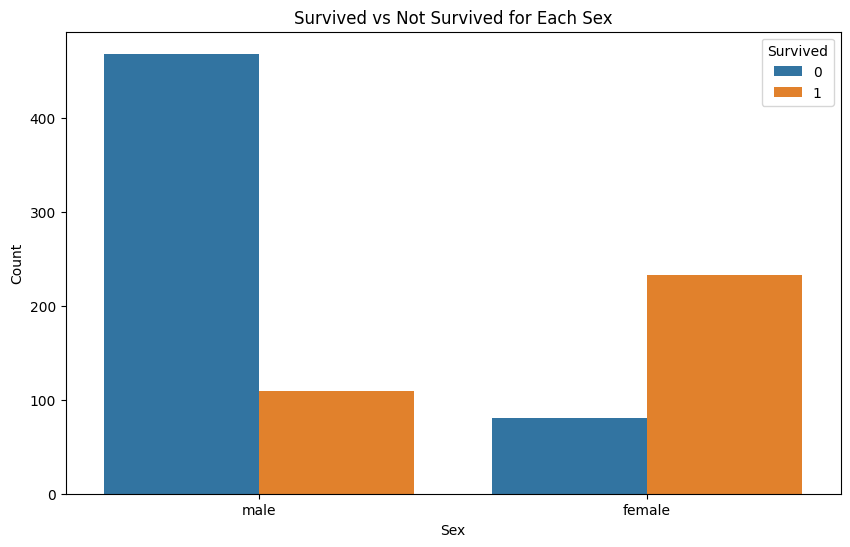

In [416]:
display_correlation('Sex', 'Survived')

### Age

In [417]:
def display_hist(x_name, y_name, bins="auto"):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train, x=x_name, hue=y_name, bins=bins)
    plt.show()

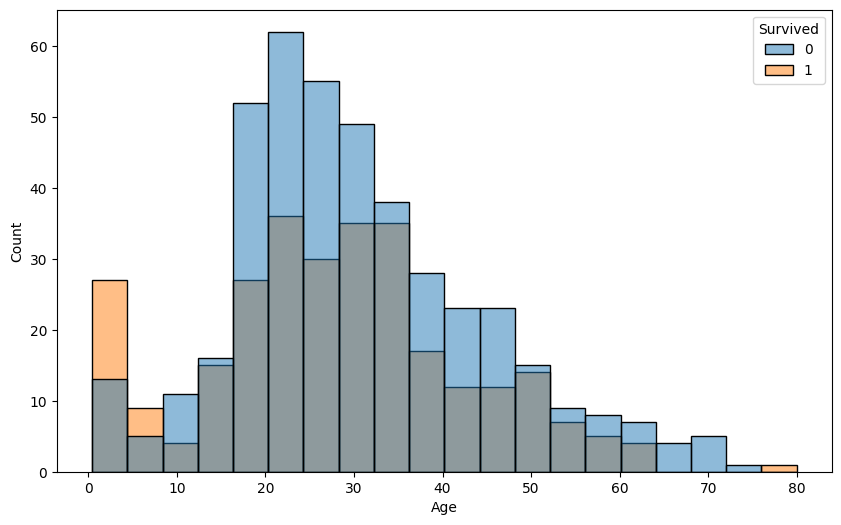

In [418]:
display_hist('Age', 'Survived')

### SibSp

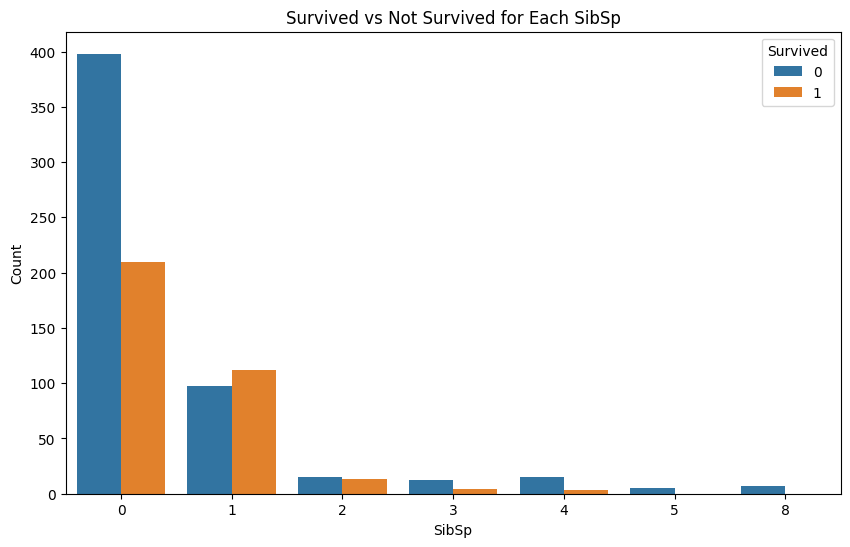

In [419]:
display_correlation('SibSp', 'Survived')

### ParCh

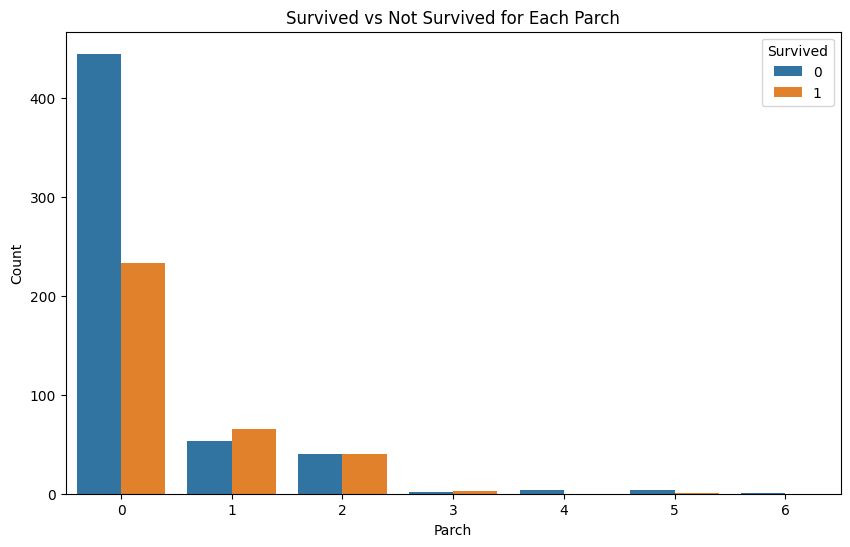

In [420]:
display_correlation('Parch', 'Survived')

### Fare

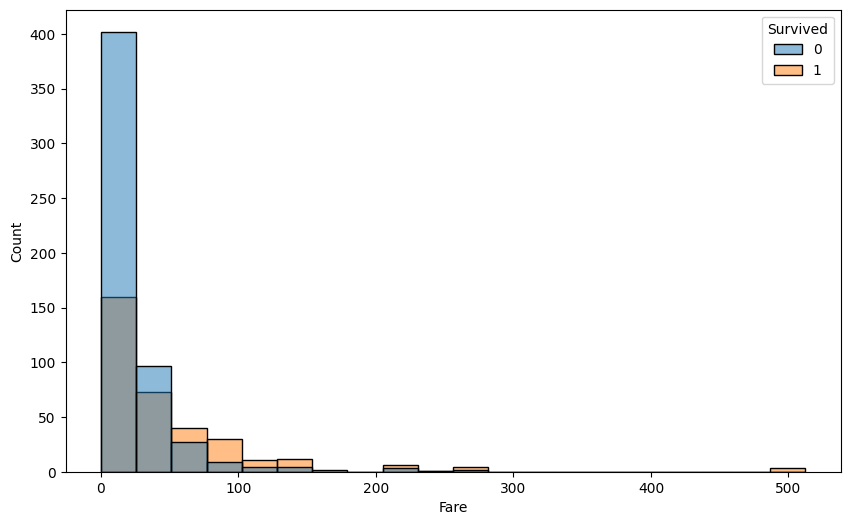

In [421]:
display_hist('Fare', 'Survived', 20)

### Cabin

In [422]:
explore['Cabin'].isna().sum() + explore['Cabin'].nunique()

np.int64(834)

In [423]:
pd.options.display.max_rows = 999
display(explore['Cabin'])

0                  NaN
1                  B78
2                  NaN
3                  NaN
4                  NaN
5                  NaN
6                  NaN
7                  NaN
8                   A5
9                  NaN
10                 C99
11                 NaN
12                 NaN
13                 NaN
14                 C70
15                 A31
16             B96 B98
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21                 NaN
22                 NaN
23                 NaN
24                 NaN
25                 NaN
26             C62 C64
27                 NaN
28                 NaN
29                 NaN
30                 NaN
31         C23 C25 C27
32                 NaN
33                 NaN
34                 NaN
35                 NaN
36                 NaN
37                 B94
38                 NaN
39                 NaN
40                 NaN
41                 NaN
42                 NaN
43         

In [424]:
explore['Floor'] = explore['Cabin'].astype(str).apply(lambda x: x[0] if x != "nan" else "nan")
explore[['Cabin', 'Floor']].nunique()

Cabin    147
Floor      9
dtype: int64

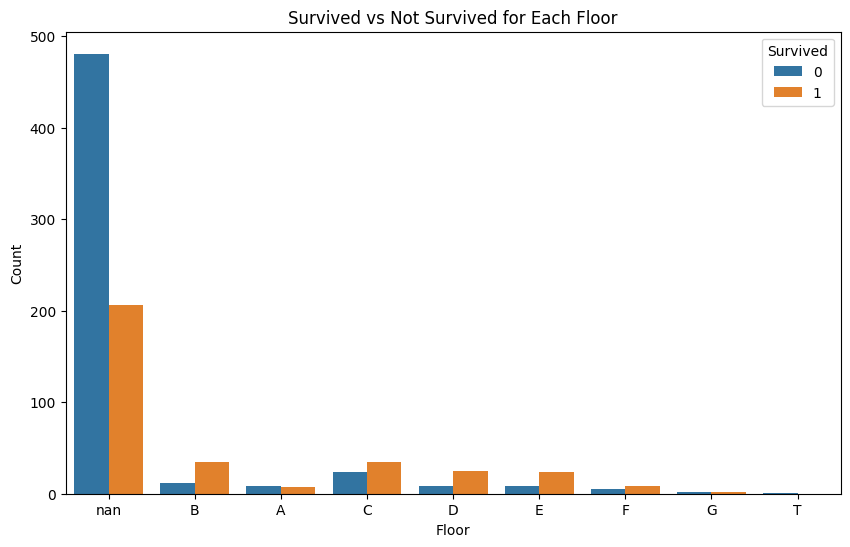

In [425]:
display_correlation('Floor', 'Survived')

### Embarked

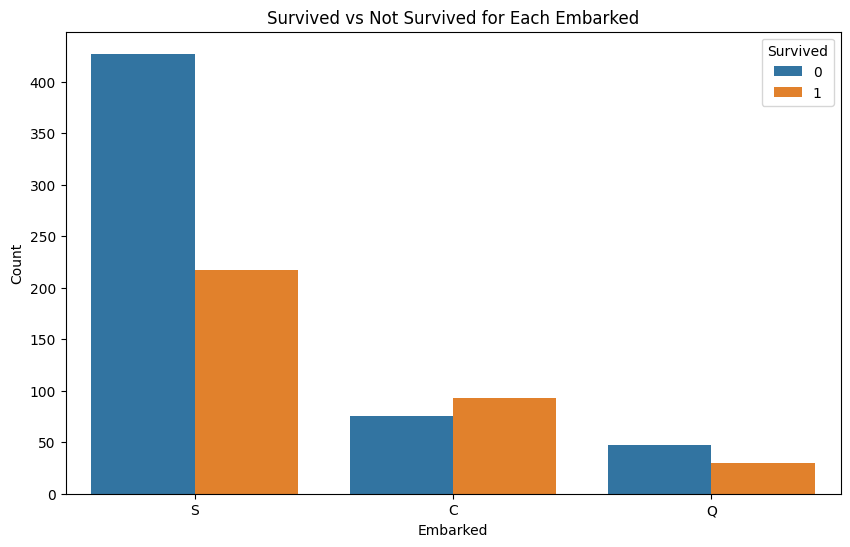

In [426]:
display_correlation('Embarked', 'Survived')

### NaN values

In [427]:
explore.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Surname          0
family_size      0
Title            0
Floor            0
dtype: int64

# Preprocessing

In [478]:
def preprocess(df, train=True):
    # df['family_size'] = df['Surname'].apply(lambda x: collections.Counter(df['Surname'])[x]-1)
    df['Title'] = df['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip(' '))
    df['Title'] = df['Title'].apply(lambda x: x if x in ['Mr', 'Mrs', 'Miss', 'Master'] else 'Other')
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Floor'] = df['Cabin'].astype(str).apply(lambda x: x[0] if x != "nan" else "nan")
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    if train:
        df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    else:
        df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    return df

In [479]:
trainp = preprocess(train)

# Models

## Random Forest

In [382]:
from sklearn.ensemble import RandomForestClassifier

Abusively treating categorical variables as ordinal (because apparently RFs do fine?).

### Preprocessing

In [468]:
def cat_to_num(df):
    df['Sex'] = df['Sex'].map({'male':0, "female":1})
    df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})
    df['Title'] = df['Title'].map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Other': 4})
    df['Floor'] = df['Floor'].map({'nan': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8})
    return df

In [531]:
trainp = cat_to_num(trainp)
trainp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Floor
0,0,3,0,18.00,0,0,8.3000,0,0,0
1,0,3,0,28.00,0,0,7.7375,2,0,0
2,1,3,1,4.00,0,1,13.4167,1,2,0
3,1,3,1,15.00,0,0,8.0292,2,2,0
4,0,2,0,19.00,1,1,36.7500,0,0,0
5,0,3,0,28.00,0,0,7.8958,0,0,0
6,1,1,1,38.00,0,0,80.0000,0,2,2
7,0,3,1,28.00,1,0,14.4542,1,2,0
8,0,3,1,9.00,4,2,31.2750,0,2,0
9,1,1,1,56.00,0,1,83.1583,1,1,3


In [532]:
trainx, valx, testx = trainp[:600], trainp[600:800], trainp[800:]

In [533]:
trainxx, trainy = trainx.drop('Survived', axis=1), trainx['Survived']

In [534]:
model = RandomForestClassifier()
model.fit(trainxx,trainy)

RandomForestClassifier()

In [535]:
mval = model.predict(valx.drop('Survived', axis=1))
mtest = model.predict(testx.drop('Survived', axis=1))

In [536]:
from sklearn.metrics import accuracy_score
accuracy_score(valx['Survived'], mval)
accuracy_score(testx['Survived'], mtest)

0.8131868131868132

### Submit

In [537]:
testp = cat_to_num(preprocess(test, False))

In [539]:
model.fit(trainp.drop('Survived', axis=1), trainp['Survived'])
res = model.predict(testp.drop('PassengerId', axis=1))

In [540]:
with open('submission.csv', 'w') as f:
    f.write('PassengerId,Survived\n')
    for i in range(len(res)):
        f.write(f"{testp['PassengerId'][i]},{res[i]}\n")